In [1]:
import os 
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import cm 



In [2]:
rpkm_dir = '/Users/indrikwijaya/Desktop/fyp/rpkmCombined/'

rpkm_files = list(filter(lambda x: x.split('.')[-1] == 'csv', os.listdir(rpkm_dir)))
rpkm_files_path = list(map(lambda x: rpkm_dir+x, rpkm_files))
rpkm_files_dict = {x.split("_")[2][:6]:x for x in rpkm_files_path}

In [3]:
rpkm_files_dict

{'CGATGT': '/Users/indrikwijaya/Desktop/fyp/rpkmCombined/geneTXCD_RPKMoutput_CGATGT_combined.csv',
 'GCCAAT': '/Users/indrikwijaya/Desktop/fyp/rpkmCombined/geneTXCD_RPKMoutput_GCCAAT-s_4_1_seed29_combined.csv',
 'TAGCTT': '/Users/indrikwijaya/Desktop/fyp/rpkmCombined/geneTXCD_RPKMoutput_TAGCTT_combined.csv',
 'TGACCA': '/Users/indrikwijaya/Desktop/fyp/rpkmCombined/geneTXCD_RPKMoutput_TGACCA-s_4_1_seed29_combined.csv'}

In [4]:
t4_tot_rna = pd.read_csv(rpkm_files_dict['TAGCTT'], sep = '\t', lineterminator='\n')
t4_tot_rpf = pd.read_csv(rpkm_files_dict['CGATGT'], sep = '\t', lineterminator='\n')
t6_tot_rna = pd.read_csv(rpkm_files_dict['TGACCA'], sep = '\t', lineterminator='\n')
t6_tot_rpf = pd.read_csv(rpkm_files_dict['GCCAAT'], sep = '\t', lineterminator='\n')


                    

In [5]:
t4_tot_rna_rpkm = t4_tot_rna[['AccNum', 'txRPKM']]
t4_tot_rpf_rpkm = t4_tot_rpf[['AccNum', 'cdRPKM']]
t6_tot_rna_rpkm = t6_tot_rna[['AccNum', 'txRPKM']]
t6_tot_rpf_rpkm = t6_tot_rpf[['AccNum', 'cdRPKM']]

In [6]:
#merge RNA & RPF
t4_tot_rpkm = pd.merge(t4_tot_rna_rpkm, t4_tot_rpf_rpkm, how ='inner', on ='AccNum')
t6_tot_rpkm = pd.merge(t6_tot_rna_rpkm, t6_tot_rpf_rpkm, how ='inner', on = 'AccNum')

In [7]:
#Remove rows with '-'
t4_tot_rpkm = t4_tot_rpkm[t4_tot_rpkm.txRPKM != '-']
t4_tot_rpkm = t4_tot_rpkm[t4_tot_rpkm.cdRPKM != '-']
t6_tot_rpkm = t6_tot_rpkm[t6_tot_rpkm.txRPKM != '-']
t6_tot_rpkm = t6_tot_rpkm[t6_tot_rpkm.cdRPKM != '-']

In [8]:
#Convert to log-2 fold change
def change_to_numeric(x):
    return math.log2(float(x))


t4_tot_rpkm['txRPKM'] = t4_tot_rpkm.apply(lambda x: change_to_numeric(x['txRPKM']), axis = 1)
t4_tot_rpkm['cdRPKM'] = t4_tot_rpkm.apply(lambda x: change_to_numeric(x['cdRPKM']), axis = 1)

t6_tot_rpkm['txRPKM'] = t6_tot_rpkm.apply(lambda x: change_to_numeric(x['txRPKM']), axis = 1)
t6_tot_rpkm['cdRPKM'] = t6_tot_rpkm.apply(lambda x: change_to_numeric(x['cdRPKM']), axis = 1)

# Calculate TE

In [9]:
#Calculate TE

t4_tot_rpkm['TE'] = t4_tot_rpkm['cdRPKM']/t4_tot_rpkm['txRPKM']

t6_tot_rpkm['TE'] = t6_tot_rpkm['cdRPKM']/t6_tot_rpkm['txRPKM']

In [10]:
t4_tot_rpkm.describe()

,txRPKM,cdRPKM,TE
count,11330.000000,11330.000000,11330.000000
mean,2.988834,3.553711,1.561442
std,2.462440,2.783843,39.380556
min,-5.156902,-6.865154,-1158.144520
25%,1.580571,2.011309,0.914324
50%,3.233535,3.816958,1.148722
75%,4.607025,5.349915,1.408824
max,13.344327,15.373132,3799.699072


In [11]:
t6_tot_rpkm.describe()

,txRPKM,cdRPKM,TE
count,11171.000000,11171.000000,11171.000000
mean,2.995365,3.865802,0.994006
std,2.494160,2.506648,10.473596
min,-7.107400,-5.466047,-511.529155
25%,1.641604,2.421456,0.931066
50%,3.257651,4.040295,1.159701
75%,4.606836,5.469568,1.431380
max,12.669535,14.219819,426.543353


In [12]:
t4_t6 = pd.merge(t4_tot_rpkm, t6_tot_rpkm, how = 'inner', on = 'AccNum')

In [13]:
t4_t6.describe()

,txRPKM_x,cdRPKM_x,TE_x,txRPKM_y,cdRPKM_y,TE_y
count,10752.000000,10752.000000,10752.000000,10752.000000,10752.000000,10752.000000
mean,3.217997,3.832311,1.513555,3.192258,4.043388,1.030461
std,2.279801,2.544384,39.602296,2.303101,2.370434,10.651506
min,-5.156902,-6.222522,-1158.144520,-5.924932,-4.898667,-511.529155
25%,1.890976,2.342459,0.931996,1.869993,2.648140,0.958259
50%,3.355660,3.969026,1.151210,3.347552,4.134671,1.172768
75%,4.689775,5.462239,1.401315,4.665554,5.546579,1.442400
max,13.344327,15.373132,3799.699072,12.669535,14.219819,426.543353


In [29]:
t4_t6_rna = t4_t6[['AccNum', 'txRPKM_x', 'txRPKM_y']]
t4_t6_rna.describe()

,txRPKM_x,txRPKM_y
count,10752.000000,10752.000000
mean,3.217997,3.192258
std,2.279801,2.303101
min,-5.156902,-5.924932
25%,1.890976,1.869993
50%,3.355660,3.347552
75%,4.689775,4.665554
max,13.344327,12.669535


In [31]:
t4_t6_rpf = t4_t6[['AccNum', 'cdRPKM_x', 'cdRPKM_y']]
t4_t6_rpf.describe()

,cdRPKM_x,cdRPKM_y
count,10752.000000,10752.000000
mean,3.832311,4.043388
std,2.544384,2.370434
min,-6.222522,-4.898667
25%,2.342459,2.648140
50%,3.969026,4.134671
75%,5.462239,5.546579
max,15.373132,14.219819


In [19]:
from bokeh.plotting import figure, show,output_notebook, output_file
from bokeh.models import ColumnDataSource, LabelSet, Label, HoverTool

N=4000

radii = np.random.random(size=N) * 1.5
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100

colors = ["#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)]

TOOLS="hover,crosshair,pan,wheel_zoom,box_zoom,reset,tap,save"

hover=HoverTool(tooltips = [
        ('id', '@assension_id'),
    ('(x,y)','(@x, @y)')
])

In [35]:
def plot_bokeh(dataframe, label):
    hover=HoverTool(tooltips = [
        ('id', '@assension_id'),
    ('(x,y)','(@x, @y)')
    ])

    data_source = ColumnDataSource(data = dict(assension_id = dataframe.iloc[:,0],
                                          x = dataframe.iloc[:,1],
                                         y = dataframe.iloc[:,2]
                             ))

    data_plot = figure(tools=[hover], title = label+' day 6 vs '+label+' day 4')

    data_plot.scatter('x', 'y', source = data_source,fill_color = colors, fill_alpha = 0.6)
    data_plot.xaxis[0].axis_label = label +' day 4'
    data_plot.yaxis[0].axis_label = label+' day 6'
    # labels = LabelSet(x = 'rna_read', y = 'rpf_read', text = 'assension_id', level = 'glyph',
    #                  source = source, render_mode = 'canvas')
    # p.add_layout(labels)

    #output_file('RNA Total vs RPF Total')
    show(data_plot)

# RNA Plot

In [36]:
plot_bokeh(t4_t6_rna, 'RNA')

/Users/indrikwijaya/anaconda3/lib/python3.6/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/indrikwijaya/anaconda3/lib/python3.6/site-packages/bokeh/models/sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))


# RPF Plot

In [37]:
plot_bokeh(t4_t6_rpf, 'RPF')

/Users/indrikwijaya/anaconda3/lib/python3.6/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/indrikwijaya/anaconda3/lib/python3.6/site-packages/bokeh/models/sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))


# TE Plot

In [14]:
t4_t6_te = t4_t6[['AccNum', 'TE_x', 'TE_y']]
t4_t6_te.describe()


,TE_x,TE_y
count,10752.000000,10752.000000
mean,1.513555,1.030461
std,39.602296,10.651506
min,-1158.144520,-511.529155
25%,0.931996,0.958259
50%,1.151210,1.172768
75%,1.401315,1.442400
max,3799.699072,426.543353


In [16]:
t4_t6_te_excel = pd.ExcelWriter('t4_t6_te.xlsx', engine = 'xlsxwriter')
t4_t6_te.to_excel(t4_t6_te_excel, index = False, sheet_name = 't4_t6_te')
t4_t6_te_excel.save()


In [41]:
t4_t6_te_filter = t4_t6_te[t4_t6_te['TE_x']<3]
t4_t6_te_filter = t4_t6_te_filter[t4_t6_te_filter['TE_x']>0]
t4_t6_te_filter = t4_t6_te_filter[t4_t6_te_filter['TE_y']<3]
t4_t6_te_filter = t4_t6_te_filter[t4_t6_te_filter['TE_y']>0]
t4_t6_te_filter.describe()

,TE_x,TE_y
count,9037.000000,9037.000000
mean,1.190944,1.240766
std,0.407327,0.429396
min,0.000778,0.005483
25%,0.981657,1.006390
50%,1.152649,1.181022
75%,1.358071,1.402893
max,2.995349,2.994171


In [42]:
plot_bokeh(t4_t6_te, 'TE')
plot_bokeh(t4_t6_te_filter, 'TE')

/Users/indrikwijaya/anaconda3/lib/python3.6/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/indrikwijaya/anaconda3/lib/python3.6/site-packages/bokeh/models/sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))
/Users/indrikwijaya/anaconda3/lib/python3.6/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
Supplying a user-defined data source AND iterable values to glyph methods is deprecated.

See https://github.com/bokeh/bokeh/issues/2056 for more information.

  warn(message)
/Users/indrikwijaya/anaconda3/lib/python3.6/site-packages/bokeh/models/sources.py:89: BokehUserWarning: ColumnDataSource's columns must be of the same length
  la

# Calculate best model using GMM 

In [43]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

In [53]:
def bic_gmm(dataframe):

    # Number of samples per component
    n_samples = len(dataframe.iloc[:,1])
    #n_samples = len(t4_t6_te['TE_x'])

    # Generate random sample, two components
    np.random.seed(0)
    C = np.array([[0., -0.1], [1.7, .4]])
    # X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
    #           .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]

    X = dataframe.iloc[:,1:3].values
    #[['TE_x','TE_y']].values
    #X = t4_t6_te[['TE_x', 'TE_y']].values
    print(X)

    lowest_bic = np.infty
    bic = []
    n_components_range = range(1, 7)
    cv_types = ['spherical', 'tied', 'diag', 'full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = mixture.GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type)
            gmm.fit(X)
            bic.append(gmm.bic(X))
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm

    bic = np.array(bic)
    color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                                  'darkorange'])
    clf = best_gmm
    print(clf)
    bars = []

    # Plot the BIC scores
    plt.figure(figsize = (10,15))

    spl = plt.subplot(2, 1, 1)
    for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
        xpos = np.array(n_components_range) + .2 * (i - 2)
        bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                      (i + 1) * len(n_components_range)],
                            width=.2, color=color))
    plt.xticks(n_components_range)
    plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
    plt.title('BIC score per model')
    xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
        .2 * np.floor(bic.argmin() / len(n_components_range))
    plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
    spl.set_xlabel('Number of components')
    spl.legend([b[0] for b in bars], cv_types)

    # Plot the winner
    splot = plt.subplot(2, 1, 2)
    Y_ = clf.predict(X)

    for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                               color_iter)):
        v, w = linalg.eigh(cov)
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan2(w[0][1], w[0][0])
        angle = 180. * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(.5)
        splot.add_artist(ell)
    plt.xticks(())
    plt.yticks(())
    plt.title('Selected GMM: ' + clf.covariance_type +', '+ str(clf.n_components))
    plt.subplots_adjust(hspace=.35, bottom=.02)
    plt.show()

[[ 1.1167489   1.03800145]
 [ 1.92911242  2.02080525]
 [ 0.8136534   0.10776429]
 ..., 
 [ 0.9096445   1.09132871]
 [ 1.08396683  1.42174838]
 [ 1.09718991  1.53229986]]
GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=5, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)


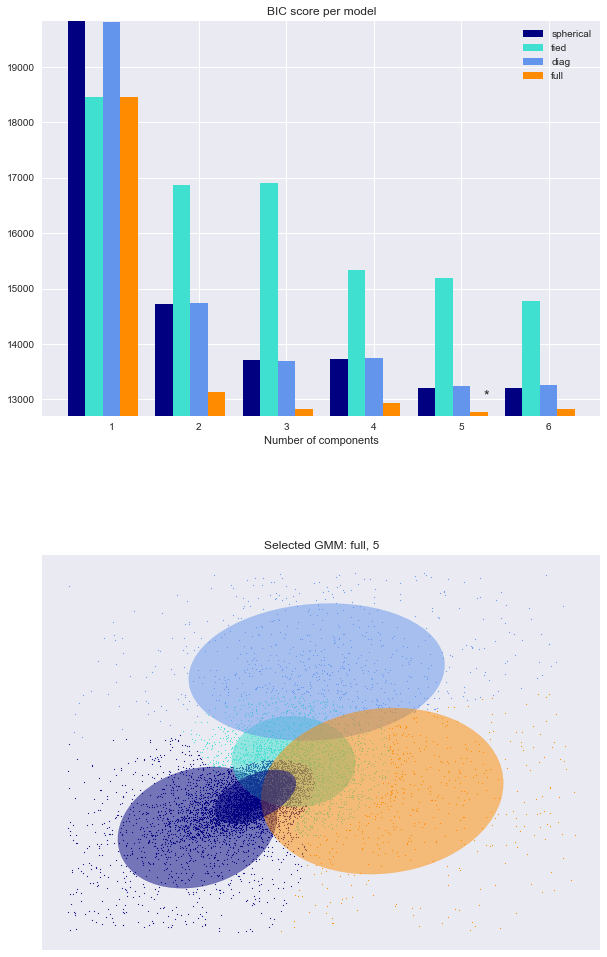

In [54]:
bic_gmm(t4_t6_te_filter)